In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
TIMES = {
    'allenai-specter': 274.79402834008096,
    'all-MiniLM-L6-v1': 55.51568825910931,
    'all-MiniLM-L6-v2': 69.42611336032388,
    'paraphrase-distilroberta-base-v2': 135.1174089068826,
    'all-roberta-large-v1': 809.4736842105264 ,
    'all-mpnet-base-v1': 285.9261133603239,
    'all-mpnet-base-v2': 273.11032388663966,
    'all-MiniLM-L12-v1': 119.71255060728745,
    'all-distilroberta-v1': 159.2332995951417,
}

In [3]:
df = pd.read_csv('../data/validation_results.csv')
df.head()

,model,threshold,precision,recall
0,allenai-specter,1.00,0.0,0.0
1,allenai-specter,0.99,0.0,0.0
2,allenai-specter,0.98,0.0,0.0
3,allenai-specter,0.97,0.0,0.0
4,allenai-specter,0.96,0.0,0.0


In [4]:
# remove thresholds without result
df = df.loc[(df.precision > 0) & (df.recall > 0)]
df.head()

,model,threshold,precision,recall
11,allenai-specter,0.89,1.000000,0.013664
12,allenai-specter,0.88,0.883333,0.029352
13,allenai-specter,0.87,0.882500,0.057692
14,allenai-specter,0.86,0.860476,0.099190
15,allenai-specter,0.85,0.710156,0.165486


In [5]:
# calculate f1score
df = df.assign(f1score=lambda x: (2*x['precision']*x['recall'])/(x['precision']+x['recall']))
df.head()

,model,threshold,precision,recall,f1score
11,allenai-specter,0.89,1.000000,0.013664,0.026960
12,allenai-specter,0.88,0.883333,0.029352,0.056817
13,allenai-specter,0.87,0.882500,0.057692,0.108304
14,allenai-specter,0.86,0.860476,0.099190,0.177876
15,allenai-specter,0.85,0.710156,0.165486,0.268422


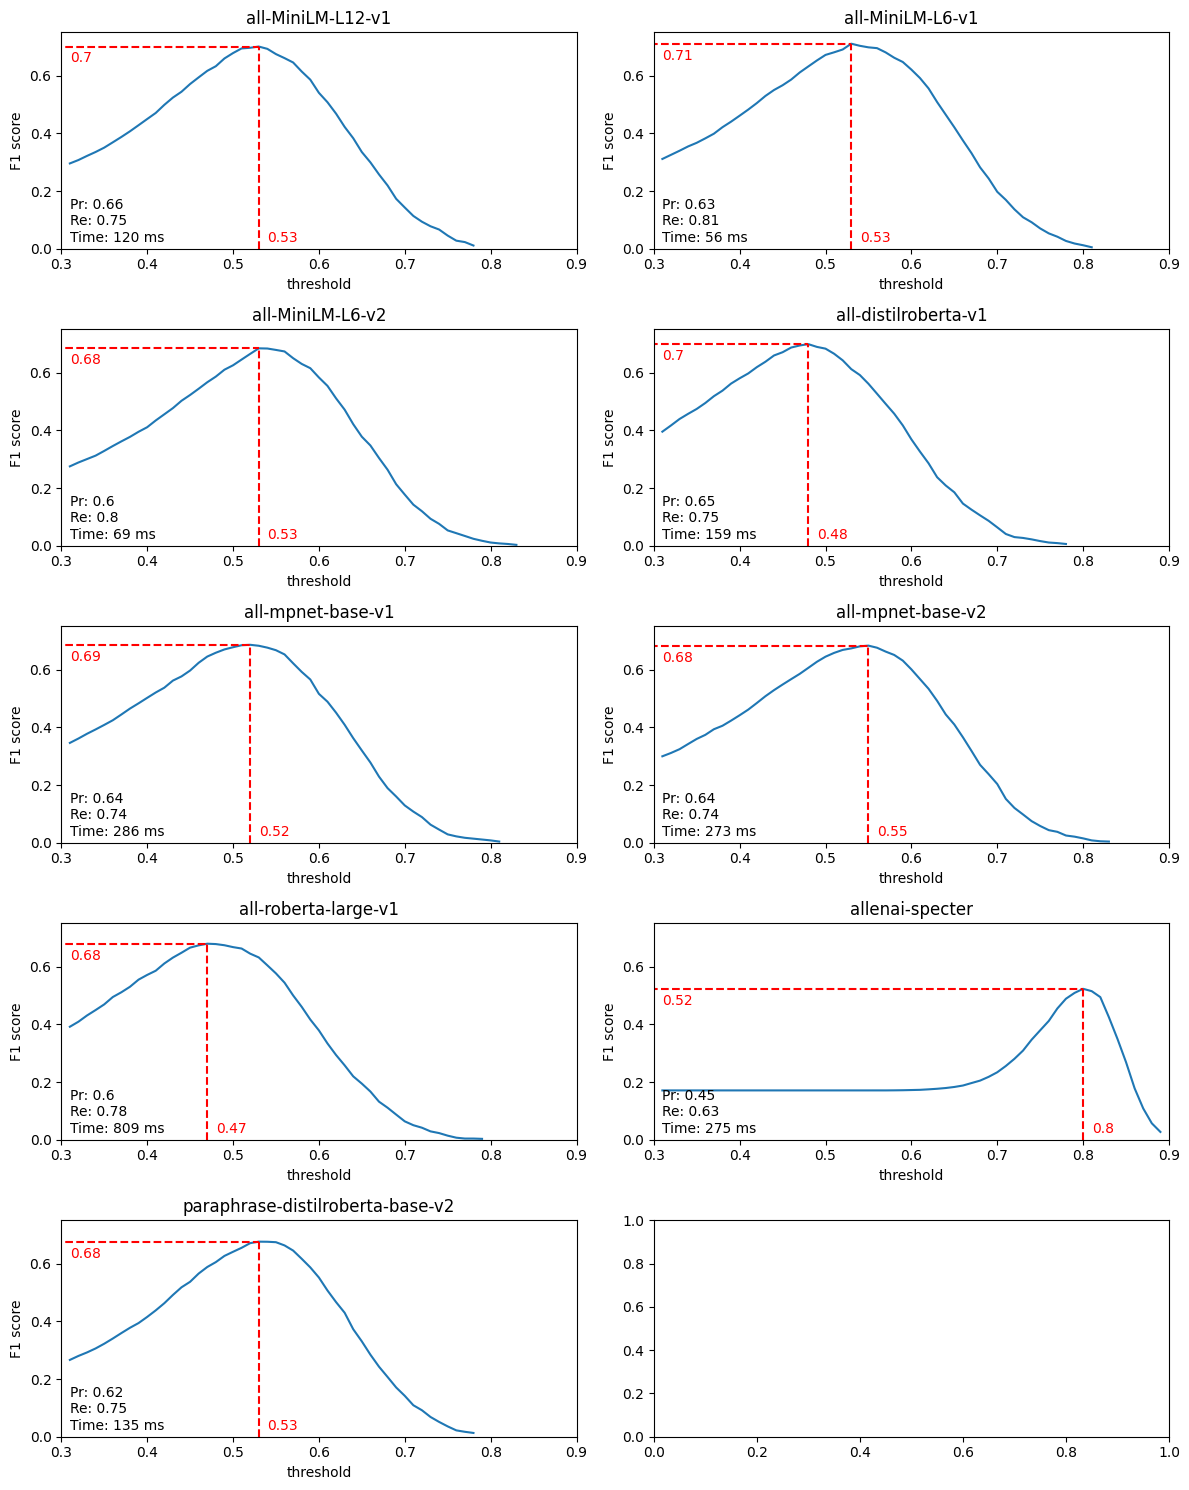

In [6]:
grouped = df.groupby('model')
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12,15))
axs_f = axs.flatten()

for i, (model, grp) in enumerate(grouped):
    max_f1 = grp.f1score.max()
    best_threshold = round(grp.loc[grp.f1score == max_f1, 'threshold'].iloc[0], 2)
    precision = round(grp.loc[grp.f1score == max_f1, 'precision'].iloc[0], 2)
    recall = round(grp.loc[grp.f1score == max_f1, 'recall'].iloc[0], 2)
    grp.plot(x='threshold', y='f1score', xlim=(0.3, 0.9), ylim=(0,0.75), legend=False, title=model, ax=axs_f[i], xlabel='threshold', ylabel='F1 score')
    axs_f[i].vlines(x=best_threshold, ymin=0, ymax=max_f1, color='red', linestyle='dashed')
    axs_f[i].text(best_threshold+0.01, 0.025, best_threshold, color='red')
    axs_f[i].hlines(y=max_f1, xmin=0, xmax=best_threshold, color='red', linestyle='dashed')
    axs_f[i].text(0.31, max_f1-0.055, round(max_f1, 2), color='red')
    axs_f[i].text(0.31, 0.025, f'Pr: {precision}\nRe: {recall}\nTime: {int(round(TIMES[model], 0))} ms')
plt.tight_layout()
plt.show()

## Final model  

### **all-MiniLM-L6-v1**

Average predict time in ms: 56  
Metrics for threshold: 0.53
* precsion: 0.63
* recall: 0.81